In [1]:
#pip install ucimlrepo --user


Estamos descargando una Base de datos  de informacion creditica de un banco aleman de 1994. Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como de buen o mal riesgo crediticio.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

Revision de nuestras variables 

In [3]:
#Revisar nuestros datos 
X.head(2)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [4]:
#Rebombrar nuestras columnas con base a la documentacion 


X.rename(columns={
    'Attribute1': 'Estado_Cuenta_Corriente','Attribute2': 'Duracion_Meses','Attribute3': 'Historial_Credito','Attribute4': 'Proposito','Attribute5': 'Monto_Credito',
     'Attribute6': 'Estado_Cuenta_Ahorros','Attribute7': 'Antiguedad_Empleo','Attribute8': 'Porcentaje_Cuota','Attribute9': 'Estado_Personal_Sexo','Attribute10': 'Otros_Deudores_Avalistas',
 'Attribute11': 'Antiguedad_Residencia','Attribute12': 'Tipo_Propiedad','Attribute13': 'Edad_Anos','Attribute14': 'Otros_Planes_Financiamiento','Attribute15': 'Tipo_Vivienda',
 'Attribute16': 'Cantidad_Creditos_Existentes','Attribute17': 'Tipo_Trabajo','Attribute18': 'Cantidad_Dependientes','Attribute19': 'Telefono',
 'Attribute20': 'Es_Trabajador_Extranjero'
}, inplace=True)


C:\Users\jopulgar\AppData\Local\Temp\ipykernel_8840\3039125898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={


Es iportante hacer un pequeño anlisis de nuestra base de datos y revisar que tipos de datos tenemos como si tambien tenemos datos faltantes

In [5]:
X.isna().any().any()

False

In [6]:
#Atributo que nos devuelve la existencia de datos faltantes
X.isna().value_counts()

Estado_Cuenta_Corriente  Duracion_Meses  Historial_Credito  Proposito  Monto_Credito  Estado_Cuenta_Ahorros  Antiguedad_Empleo  Porcentaje_Cuota  Estado_Personal_Sexo  Otros_Deudores_Avalistas  Antiguedad_Residencia  Tipo_Propiedad  Edad_Anos  Otros_Planes_Financiamiento  Tipo_Vivienda  Cantidad_Creditos_Existentes  Tipo_Trabajo  Cantidad_Dependientes  Telefono  Es_Trabajador_Extranjero
False                    False           False              False      False          False                  False              False             False                 False                     False                  False           False      False                        False          False                         False         False                  False     False                       1000
Name: count, dtype: int64

In [7]:
X.head(2)

,Estado_Cuenta_Corriente,Duracion_Meses,Historial_Credito,Proposito,Monto_Credito,Estado_Cuenta_Ahorros,Antiguedad_Empleo,Porcentaje_Cuota,Estado_Personal_Sexo,Otros_Deudores_Avalistas,Antiguedad_Residencia,Tipo_Propiedad,Edad_Anos,Otros_Planes_Financiamiento,Tipo_Vivienda,Cantidad_Creditos_Existentes,Tipo_Trabajo,Cantidad_Dependientes,Telefono,Es_Trabajador_Extranjero
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [8]:
#Revisar los tipos de datos de nuestras variables
X.dtypes
#int64 = variable numerica 
#Objeto normalmente un texto pero puede ser el caso de tener texto y numeros

Estado_Cuenta_Corriente         object
Duracion_Meses                   int64
Historial_Credito               object
Proposito                       object
Monto_Credito                    int64
Estado_Cuenta_Ahorros           object
Antiguedad_Empleo               object
Porcentaje_Cuota                 int64
Estado_Personal_Sexo            object
Otros_Deudores_Avalistas        object
Antiguedad_Residencia            int64
Tipo_Propiedad                  object
Edad_Anos                        int64
Otros_Planes_Financiamiento     object
Tipo_Vivienda                   object
Cantidad_Creditos_Existentes     int64
Tipo_Trabajo                    object
Cantidad_Dependientes            int64
Telefono                        object
Es_Trabajador_Extranjero        object
dtype: object

In [9]:
X.head(3)

,Estado_Cuenta_Corriente,Duracion_Meses,Historial_Credito,Proposito,Monto_Credito,Estado_Cuenta_Ahorros,Antiguedad_Empleo,Porcentaje_Cuota,Estado_Personal_Sexo,Otros_Deudores_Avalistas,Antiguedad_Residencia,Tipo_Propiedad,Edad_Anos,Otros_Planes_Financiamiento,Tipo_Vivienda,Cantidad_Creditos_Existentes,Tipo_Trabajo,Cantidad_Dependientes,Telefono,Es_Trabajador_Extranjero
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201


Ahora debemos convertir nuestras variables categoricas en numero interpretables para nuestros modelos utilizaremos  el preprocesador OrdinalEncoder de sklearn para poder tranformar nuestros datos

In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Filtrar las columnas de tipo 'object'
columnas_object = X.select_dtypes(include=['object']).columns

# Instanciar el encoder
encoder = OrdinalEncoder()

# Aplicar el encoder a las columnas de tipo 'object'
X[columnas_object] = encoder.fit_transform(X[columnas_object])

# Mostrar el DataFrame resultante
X.head(3)


C:\Users\jopulgar\AppData\Local\Temp\ipykernel_8840\360856234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columnas_object] = encoder.fit_transform(X[columnas_object])


,Estado_Cuenta_Corriente,Duracion_Meses,Historial_Credito,Proposito,Monto_Credito,Estado_Cuenta_Ahorros,Antiguedad_Empleo,Porcentaje_Cuota,Estado_Personal_Sexo,Otros_Deudores_Avalistas,Antiguedad_Residencia,Tipo_Propiedad,Edad_Anos,Otros_Planes_Financiamiento,Tipo_Vivienda,Cantidad_Creditos_Existentes,Tipo_Trabajo,Cantidad_Dependientes,Telefono,Es_Trabajador_Extranjero
0,0.0,6,4.0,4.0,1169,4.0,4.0,4,2.0,0.0,4,0.0,67,2.0,1.0,2,2.0,1,1.0,0.0
1,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,0.0,2,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0
2,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,0.0,3,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0


In [11]:

y.value_counts()
#Revisar en la documentacion  que significan las clases
# Notamos como el tipo de datos es int64 lo que 
# significa que no es necesarios convertir nuestra variable objetivo
# 1 Buen credito y 0 mal credito

class
1        700
2        300
Name: count, dtype: int64

In [12]:
y.head(2)
#Nombre de clases 1 y 2 

,class
0,1
1,2


Primer modelo arbor de descicion 

Exactitud: 0.6733333333333333
Precisión: 0.6615159325658209
Sensibilidad: 0.6733333333333333
Puntuación F1: 0.6663620611035111
Matriz de Confusión:


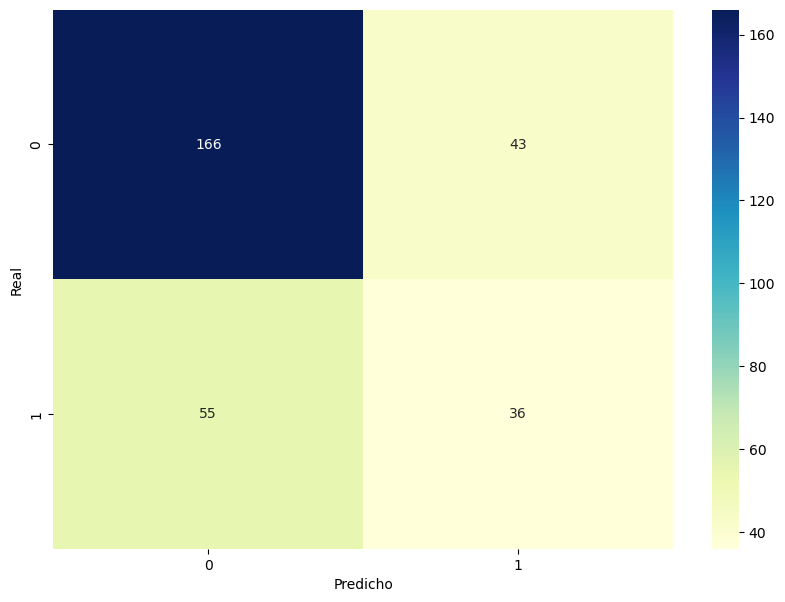

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el Árbol de Decisión
clf = DecisionTreeClassifier(max_depth=42, random_state=42)

# Entrenar el clasificador
clf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")


# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Ajuste de pesos debido al desbalanceo de clases 

Exactitud: 0.7
Precisión: 0.7118870435168301
Sensibilidad: 0.7
Puntuación F1: 0.7048448529785181
Matriz de Confusión:


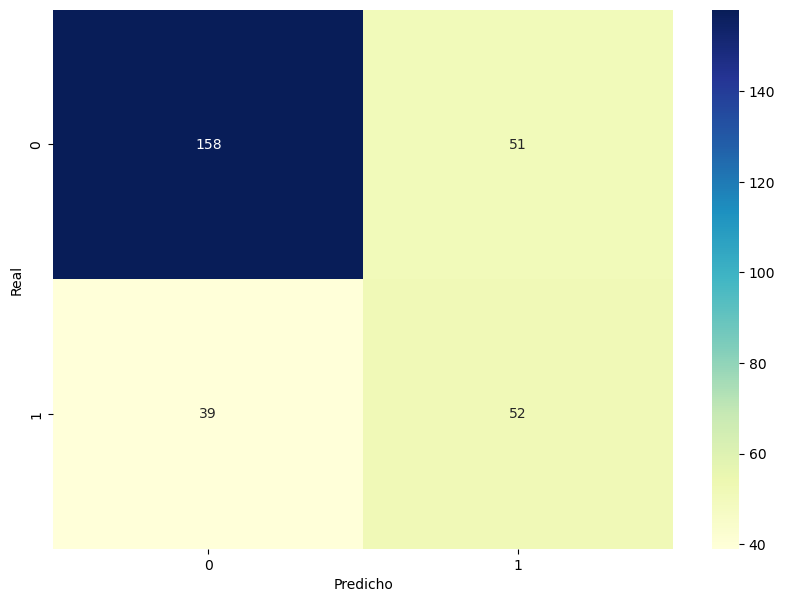

In [14]:
#En este modelo modificamos el parametro class_weight, que  determina la importancia de las clases
#Le damos mas importancia a nuestra clase mayoritaria para mejor el rendimiento de nuestro modelo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el Árbol de Decisión
clf = DecisionTreeClassifier(max_depth=42, class_weight={1: 0.7, 2: 0.3}, random_state=42)

# Entrenar el clasificador
clf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")


# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Busqueda de mejores hiperparametros

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Exactitud: 0.74
Precisión: 0.7270348729934191
Sensibilidad: 0.74
Puntuación F1: 0.7298866903433113
Matriz de Confusión:


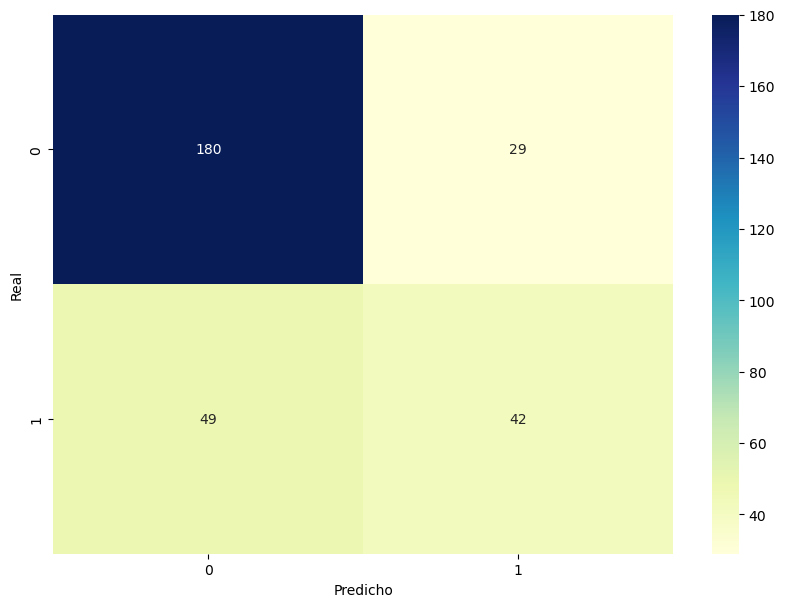

Mejores parámetros encontrados:
{'class_weight': {1: 0.7, 2: 0.3}, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parámetros para la búsqueda de grilla
param_grid = {
    'max_depth': [ 40, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,],
    'class_weight': [{1: 0.7, 2: 0.3}]

}

# Inicializar el Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42, class_weight={1: 0.7, 2: 0.3})

# Búsqueda de grilla con validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=4, scoring='accuracy', n_jobs=-1,verbose=4)
grid_search.fit(X_train, Y_train)

# Mejor modelo encontrado
best_clf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
Y_pred = best_clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)


Medir la importancia de mis variables en nuestro modelo de arbol 

In [20]:
from tabulate import tabulate

# Obtener la importancia de las características
feature_importance = best_clf.feature_importances_

# Crear un DataFrame para mostrar la importancia junto con el nombre de las características
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Ordenar el DataFrame según la importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

# Mostrar la tabla usando tabulate
print(tabulate(features_df, headers='keys', tablefmt='grid', showindex=False))


+------------------------------+--------------+
| Feature                      |   Importance |
+==============================+==============+
| Monto_Credito                |   0.155596   |
+------------------------------+--------------+
| Edad_Anos                    |   0.130498   |
+------------------------------+--------------+
| Duracion_Meses               |   0.112903   |
+------------------------------+--------------+
| Estado_Cuenta_Corriente      |   0.102732   |
+------------------------------+--------------+
| Proposito                    |   0.0832938  |
+------------------------------+--------------+
| Antiguedad_Empleo            |   0.0830531  |
+------------------------------+--------------+
| Antiguedad_Residencia        |   0.0579426  |
+------------------------------+--------------+
| Historial_Credito            |   0.0512064  |
+------------------------------+--------------+
| Estado_Cuenta_Ahorros        |   0.0489226  |
+------------------------------+--------

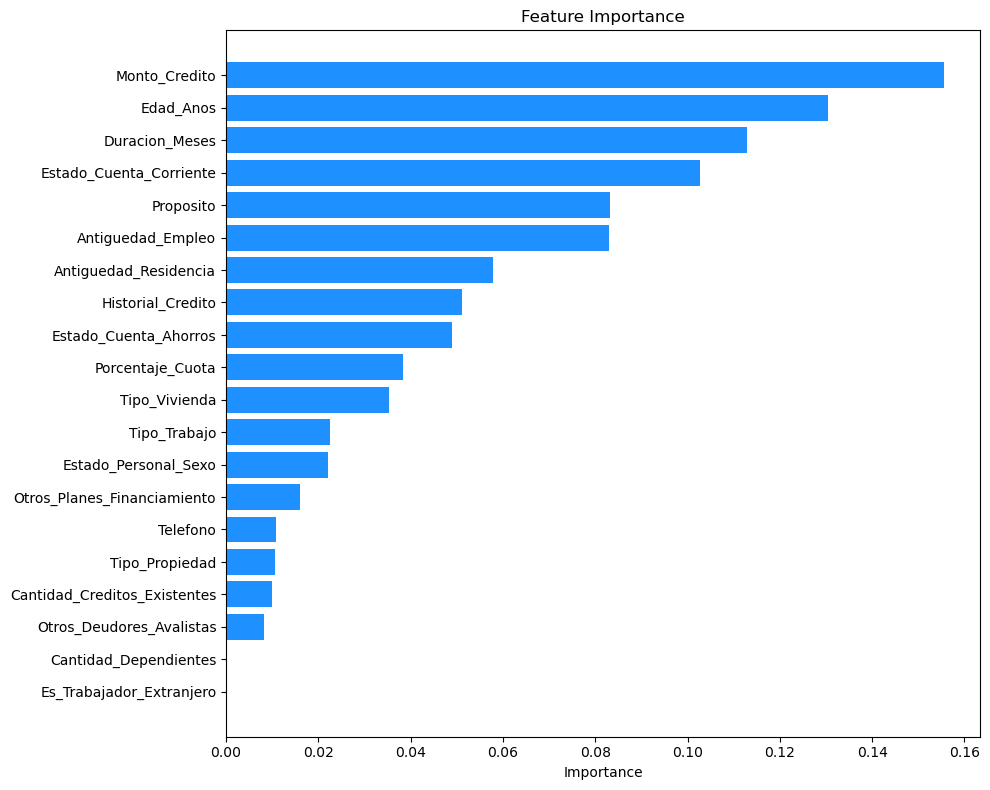

In [ ]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importance = best_clf.feature_importances_

# Crear un DataFrame para mostrar la importancia junto con el nombre de las características
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Ordenar el DataFrame según la importancia
features_df = features_df.sort_values(by='Importance', ascending=True)

# Gráfico de barras horizontal
plt.figure(figsize=(10, len(features_df) * 0.4))  # ajusta el tamaño de la figura según el número de características
plt.barh(features_df['Feature'], features_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


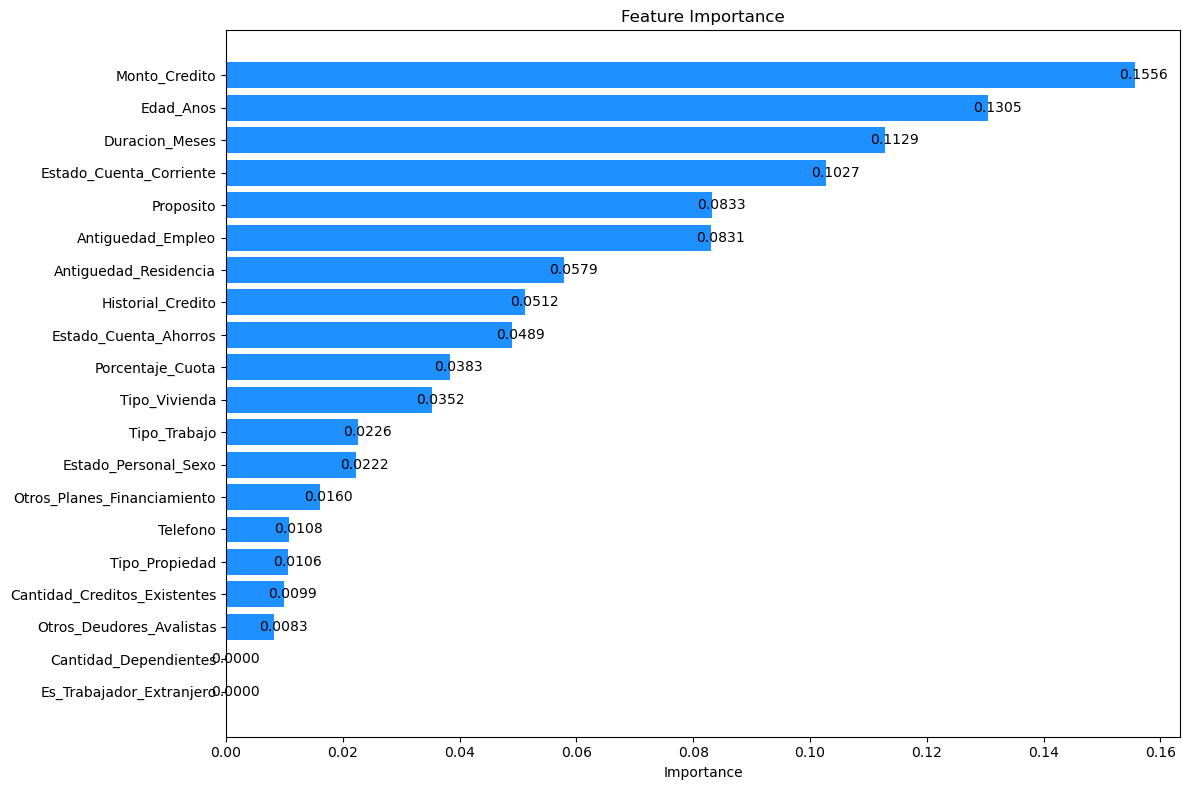

In [ ]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importance = best_clf.feature_importances_

# Crear un DataFrame para mostrar la importancia junto con el nombre de las características
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Ordenar el DataFrame según la importancia
features_df = features_df.sort_values(by='Importance', ascending=True)

# Gráfico de barras horizontal
plt.figure(figsize=(12, len(features_df) * 0.4))  # ajusta el tamaño de la figura según el número de características
bars = plt.barh(features_df['Feature'], features_df['Importance'], color='dodgerblue')

# Agregar la importancia numérica al lado derecho de cada barra
for bar in bars:
    plt.text(bar.get_width() + (0.01 * max(features_df['Importance'])),  # x
             bar.get_y() + bar.get_height()/2,  # y (posición vertical centrada en la barra)
             f'{bar.get_width():.4f}',  # texto (4 decimales)
             ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


Modelo Random forest (Bosque aleatorios)

C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Exactitud: 0.7466666666666667
Precisión: 0.7315893108298173
Sensibilidad: 0.7466666666666667
Puntuación F1: 0.7315885310504145
Matriz de Confusión:


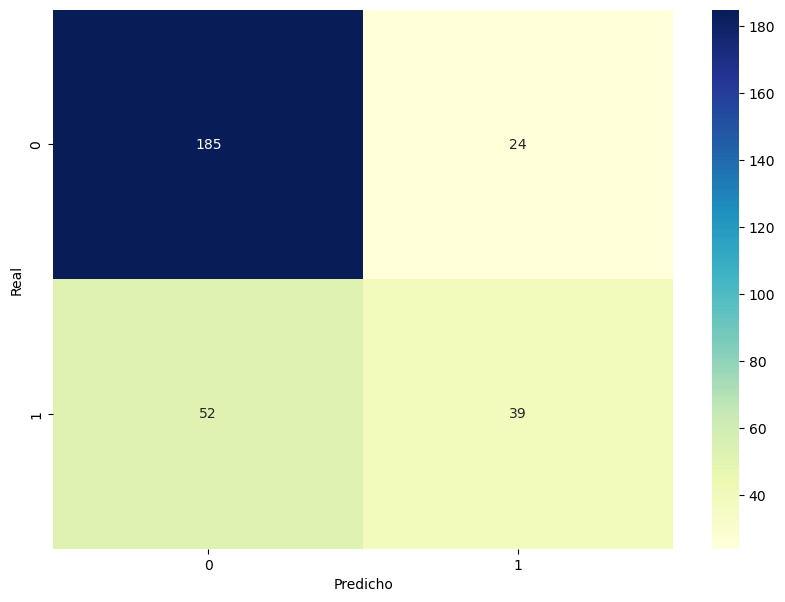

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=42, random_state=42, class_weight={1: 0.7, 2: 0.3})

# Entrenar el clasificador
clf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Busqueda de hiperparametros

Fitting 4 folds for each of 144 candidates, totalling 576 fits


C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Exactitud: 0.7533333333333333
Precisión: 0.7429378940065755
Sensibilidad: 0.7533333333333333
Puntuación F1: 0.7218580915166656
Matriz de Confusión:


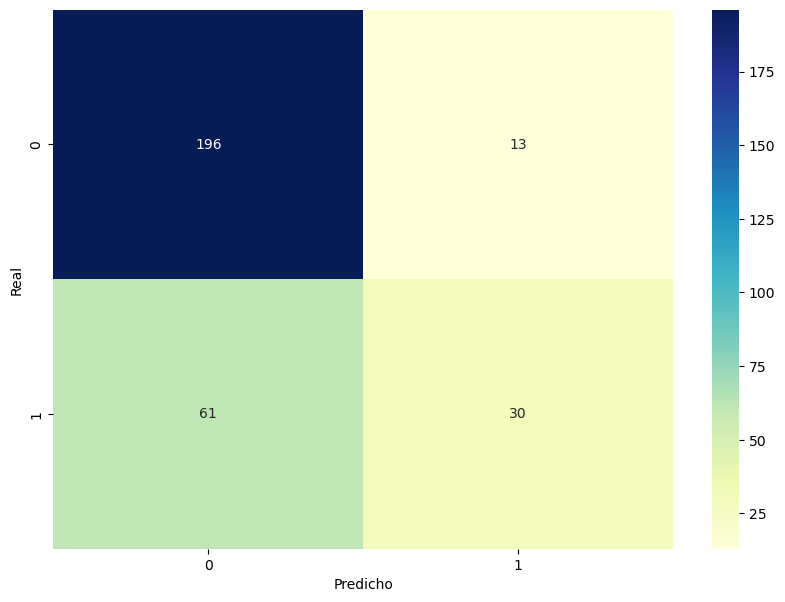

Mejores parámetros encontrados:
{'class_weight': {1: 0.7, 2: 0.3}, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parámetros para la búsqueda de grilla
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [{1: 0.7, 2: 0.3}]
}

# Inicializar el Random Forest
rf = RandomForestClassifier(random_state=42)

# Búsqueda de grilla con validación cruzada y verbose
grid_search = GridSearchCV(rf, param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
Y_pred = best_rf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)


K-vecinos mas cercanos 

C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Exactitud: 0.61
Precisión: 0.5741763771186441
Sensibilidad: 0.61
Puntuación F1: 0.5878637187386735
Matriz de Confusión:


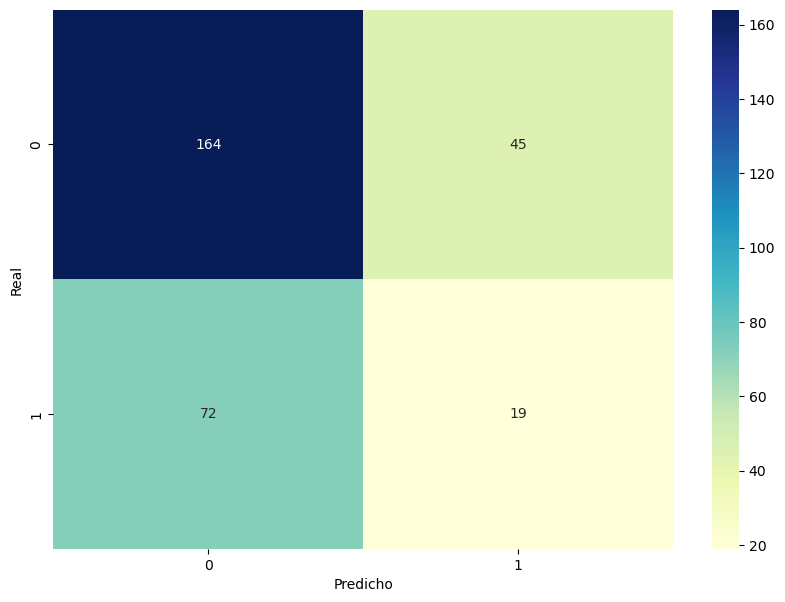

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el KNN
# Suponiendo que quieres 5 vecinos (puedes cambiar este valor)
clf = KNeighborsClassifier(n_neighbors=3)

# Entrenar el clasificador
clf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Grid Search  K-Vecinos

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Mejores hiperparámetros encontrados: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Exactitud: 0.68
Precisión: 0.6375076252723312
Sensibilidad: 0.68
Puntuación F1: 0.6417444219066936
Matriz de Confusión:


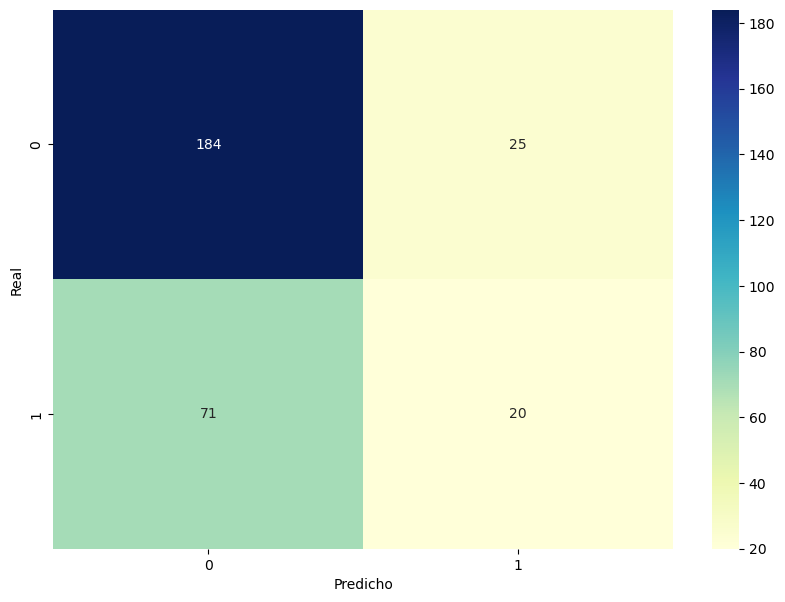

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario de hiperparámetros que deseas ajustar
param_grid = {
    'n_neighbors': [1, 3, 5, 7],  # Prueba diferentes valores para el número de vecinos
    'weights': ['uniform', 'distance'],  # Prueba diferentes métodos de ponderación
    'p': [1, 2],  # Prueba diferentes tipos de distancia (1 para Manhattan, 2 para Euclidiana)
}

# Inicializar el modelo KNN
knn = KNeighborsClassifier()

# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar la búsqueda en cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener el mejor modelo
best_knn = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
Y_pred = best_knn.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")
print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Modelo logistico

C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud: 0.7466666666666667
Precisión: 0.7846063557470189
Sensibilidad: 0.7466666666666667
Puntuación F1: 0.6823698206555349
Matriz de Confusión:


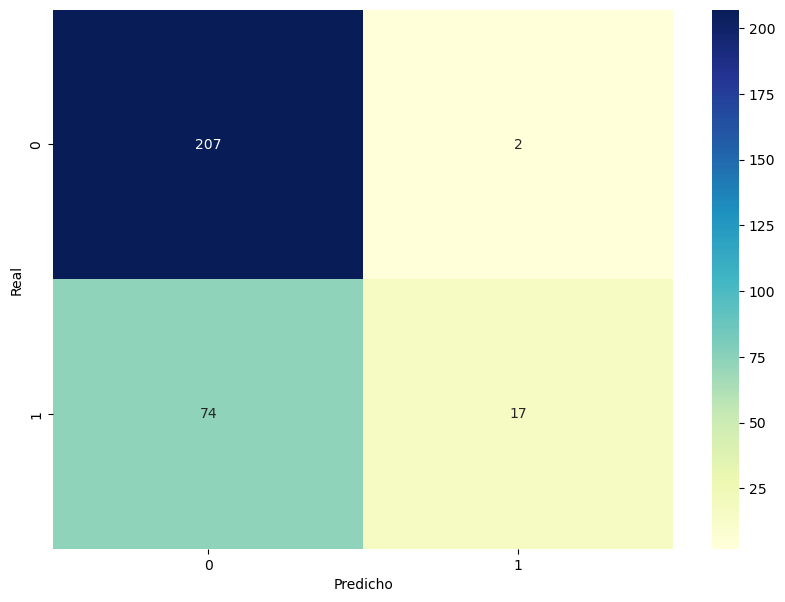

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de Regresión Logística
logistic_regression = LogisticRegression(class_weight={1: 0.7, 2: 0.3})

# Entrenar el modelo en los datos de entrenamiento
logistic_regression.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = logistic_regression.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\jopulgar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py"

Mejores hiperparámetros encontrados: {'C': 10, 'penalty': 'l2'}
Exactitud: 0.75
Precisión: 0.7880357142857144
Sensibilidad: 0.75
Puntuación F1: 0.6881943292986238
Matriz de Confusión:


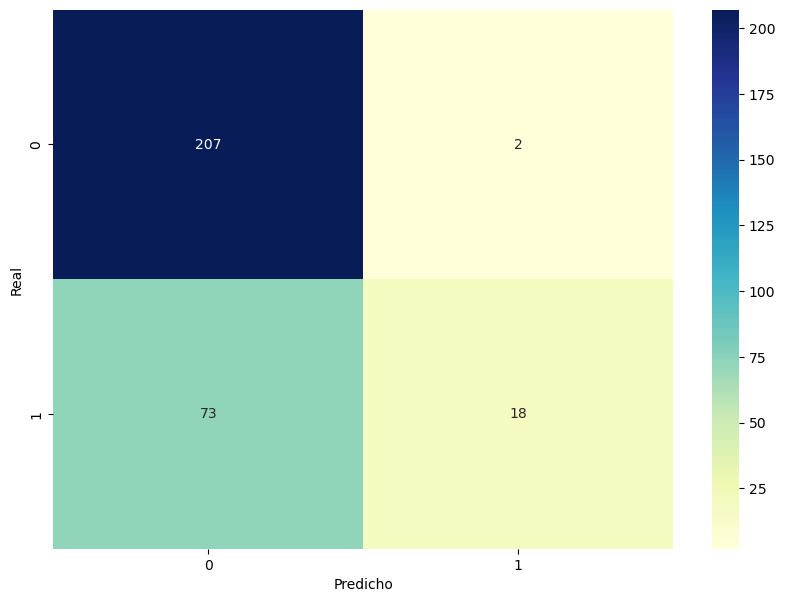

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un diccionario de hiperparámetros que deseas ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Prueba diferentes valores de regularización C
    'penalty': ['l1', 'l2'],  # Prueba diferentes tipos de penalización (L1 y L2)
}

# Inicializar el modelo de Regresión Logística
logistic_regression = LogisticRegression(class_weight={1: 0.7, 2: 0.3})

# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar la búsqueda en cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener el mejor modelo
best_logistic_regression = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
Y_pred = best_logistic_regression.predict(X_test)

# Calcular métricas
exactitud = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
sensibilidad = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
matriz_confusion = confusion_matrix(Y_test, Y_pred)

# Imprimir los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")
print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
